In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR

In [283]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [284]:
feature = irisDF[irisDF.columns[:-1]]
target = irisDF[irisDF.columns[-1]]

In [285]:
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    random_state=5,
                                                    stratify=target)

In [286]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [287]:
model = SVC(kernel='linear')
model.fit(scaled_X_train, y_train)

SVC(kernel='linear')

In [288]:
model.score(scaled_X_train, y_train), model.score(scaled_X_test, y_test)

(0.9833333333333333, 0.9666666666666667)

In [289]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, model.predict(scaled_X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


In [290]:
print(confusion_matrix(y_test, model.predict(scaled_X_test)))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [291]:
print(model.coef_, model.intercept_)

[[-0.46358112  0.34382951 -0.86155165 -0.91603383]
 [-0.06484946  0.13975604 -0.55422068 -0.54691928]
 [ 0.26577528  0.56524728 -2.15476442 -2.34278494]] [-1.50002085 -0.3092724   2.89737135]


In [292]:
def line_equ(x):
    line_loc = []
    for x in x:
        line_equ = (model.coef_[0][0]*x[0] +
                   model.coef_[0][1]*x[1] +
                   model.coef_[0][2]*x[2] +
                   model.coef_[0][3]*x[3] +
                   model.intercept_[0] )
        line_loc.append(line_equ)
        
    return line_loc

In [293]:
line_equ(scaled_X_train)

[1.6599535907981804,
 1.655962330043157,
 1.3280618641842072,
 -2.515507756761262,
 -4.017959838829688,
 -2.594779894030494,
 -5.106035140733471,
 -3.5988197641096438,
 2.2372544190472254,
 1.6683181474733244,
 -3.7936579712938645,
 -2.9593562609192547,
 1.1244723071119473,
 1.5312629752465972,
 -3.4283047791664085,
 1.5149254799380438,
 -2.329037278284049,
 -2.162512034860948,
 -4.24586944611107,
 -4.653425737201326,
 -2.856150833263273,
 -3.8474481260898816,
 -3.2545737726909145,
 -4.329136082948233,
 -2.1003509125450144,
 -1.5150771456625596,
 -4.608000072299409,
 -2.008724543861547,
 1.1455778550236992,
 -3.972535860115269,
 -3.507573777794298,
 1.714132158213546,
 -4.416769571470224,
 -3.142228615918068,
 -3.1051659216753627,
 -2.1381887124483967,
 -3.7809185326826675,
 1.7348508795218809,
 -2.3453779790149882,
 -4.167751210854704,
 1.8053733197000512,
 -4.0761344584383945,
 -3.519926389802079,
 -2.7939929163697257,
 -4.316781851533998,
 1.5479920552063637,
 -4.005987642580551,
 1

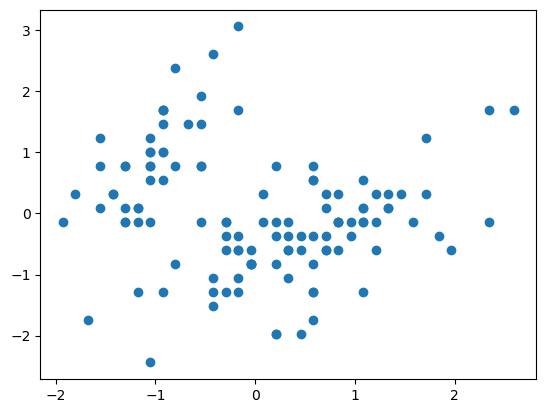

In [294]:
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1])
plt.show()

(-2.0, 2.0)

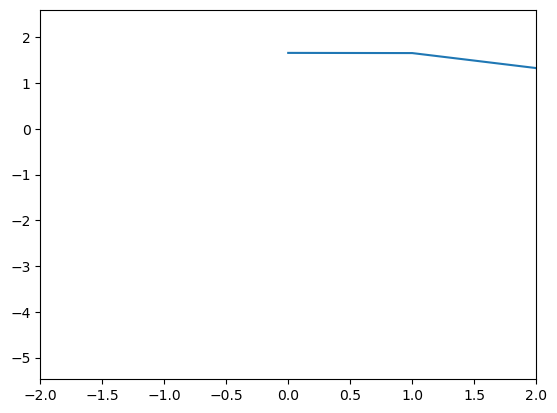

In [295]:
plt.plot(line_equ(scaled_X_train))
plt.xlim([-2, 2])

In [296]:
feature2 = irisDF[['sepal_length', 'sepal_width']]
target2 = irisDF['species']

X_train2, X_test2, y_train2, y_test2 = train_test_split(feature2, target2,
                                                        test_size=0.2,
                                                        random_state=5,
                                                        stratify=target2)

In [297]:
scaler2 = StandardScaler()
scaler2.fit(X_train2, y_train2)

StandardScaler()

In [298]:
scaled_X_train2 = scaler2.transform(X_train2)
scaled_X_test2 = scaler2.transform(X_test2)

In [299]:
model2 = SVC(kernel='linear')
model2.fit(scaled_X_train2, y_train2)

SVC(kernel='linear')

In [300]:
model2.score(scaled_X_train2, y_train2), model2.score(scaled_X_test2, y_test2)

(0.8083333333333333, 0.8333333333333334)

In [301]:
model2.coef_, model2.intercept_

(array([[-2.27759582,  1.24532565],
        [-1.7708239 ,  0.96870286],
        [-1.22520052, -0.33566438]]),
 array([-1.49306275, -0.71666218,  0.58586555]))

In [302]:
def line_equ2(x):
    line_loc = []
    for x in x:
        line_equ = (model.coef_[0][0]*x[0] +
                   model.coef_[0][1]*x[1] +
                   model.intercept_[0] )
        line_loc.append(line_equ)
        
    return line_loc

In [303]:
line_equ2(model2.support_vectors_)

[-0.9810909573215983,
 -0.9810909573215983,
 -1.0639659761170273,
 -0.8400477297622343,
 -1.0057977673530925,
 -1.3253336765368982,
 -1.5834917996598041,
 -2.073544279802777,
 -1.9572078622749078,
 -1.3301002099052073,
 -2.0942630345016346,
 -2.05282552510392,
 -1.6289173643901558,
 -1.296638811172767,
 -2.3930801889865827,
 -2.2767437714587127,
 -1.7038162725203105,
 -2.3723614342877255,
 -1.7659725366168824,
 -1.5500304009273635,
 -1.7245350272191682,
 -1.4169632840332733,
 -1.7827032359831028,
 -2.06955622447014,
 -2.214587507362141,
 -1.8823089541447522,
 -1.7659725366168824,
 -2.268767660793439,
 -1.861590199445895,
 -1.861590199445895,
 -1.4297059280668567,
 -1.9739385616411278,
 -2.0902749791689974,
 -1.4129752287006363,
 -1.9946573163399848,
 -1.6289173643901558,
 -1.840871444747038,
 -1.4129752287006363,
 -2.0360948257377,
 -1.9364891075760502,
 -1.7205469718865312,
 -1.5874798549924412,
 -1.8655782547785322,
 -1.5834917996598041,
 -1.5046048361970117,
 -1.8161646347155438,
 -

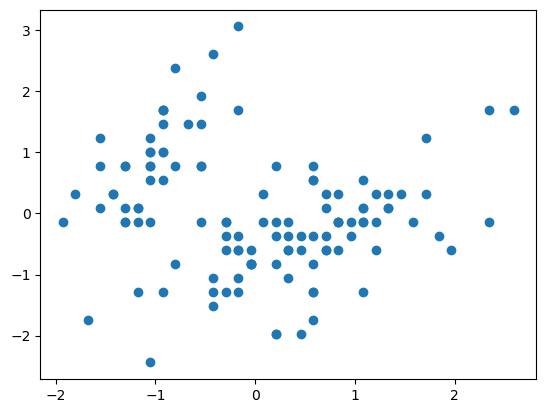

In [304]:
plt.scatter(scaled_X_train2[:, 0], scaled_X_train2[:, 1])

plt.show()

In [305]:
novirDF = irisDF[irisDF['species'] != 'virginica'].copy()

feature3 = novirDF[['sepal_length', 'sepal_width']]
target3 = novirDF['species']

X_train3, X_test3, y_train3, y_test3 = train_test_split(feature3, target3,
                                                        test_size=0.2,
                                                        random_state=5,
                                                        stratify=target3)

In [306]:
scaler3 = StandardScaler()
scaler3.fit(X_train3, y_train3)

StandardScaler()

In [307]:
scaled_X_train3 = scaler3.transform(X_train3)
scaled_X_test3 = scaler3.transform(X_test3)

In [308]:
model3 = SVC(kernel='linear')
model3.fit(scaled_X_train3, y_train3)

SVC(kernel='linear')

In [309]:
model3.score(scaled_X_train3, y_train3), model3.score(scaled_X_test3, y_test3)

(1.0, 1.0)

In [310]:
model3.coef_, model3.intercept_

(array([[ 1.9172194 , -1.39768704]]), array([0.37411522]))

In [311]:
def line_equ3(x):
    line_loc = []
    for x in x:
        line_equ = (model.coef_[0][0]*x[0] +
                   model.coef_[0][1]*x[1] +
                   model.intercept_[0] )
        line_loc.append(line_equ)
        
    return line_loc

In [312]:
line_equ3(model3.support_vectors_)

[-1.2228762492725596,
 -1.2178984975726597,
 -1.2178984975726597,
 -1.3748659933450313,
 -1.5094336064678524,
 -1.6527122850654985,
 -1.5848062595416006,
 -1.6589344746903736,
 -1.6477345333655984,
 -1.6527122850654985]

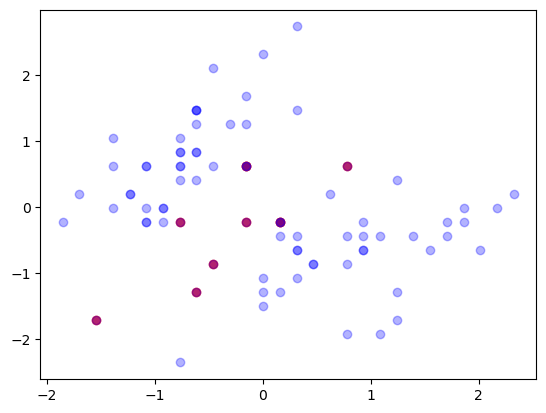

In [313]:
plt.scatter(model3.support_vectors_[:, 0], model3.support_vectors_[:, 1], color='red', alpha=0.8)
plt.scatter(scaled_X_train3[:, 0], scaled_X_train3[:, 1], color='blue', alpha=0.3)
plt.show()

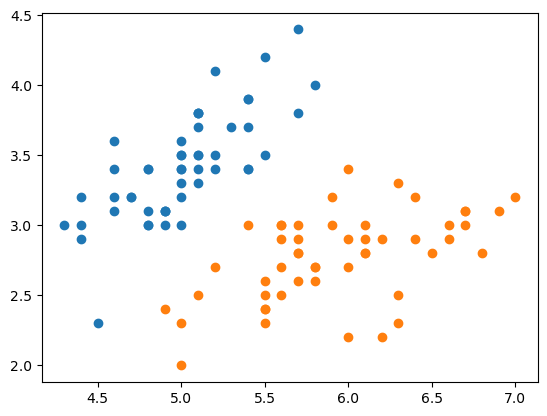

In [314]:
plt.scatter(novirDF[novirDF['species'] == 'setosa']['sepal_length'],
            novirDF[novirDF['species'] == 'setosa']['sepal_width'])
plt.scatter(novirDF[novirDF['species'] == 'versicolor']['sepal_length'],
            novirDF[novirDF['species'] == 'versicolor']['sepal_width'])
plt.show()

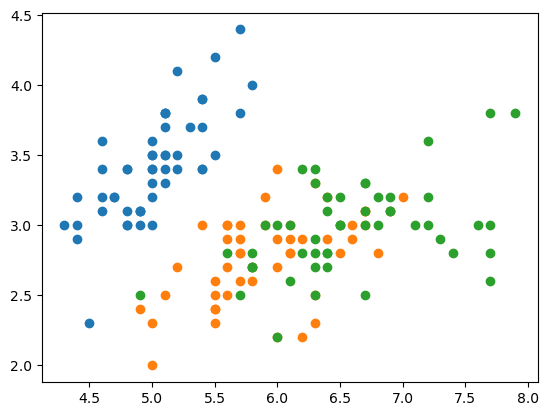

In [315]:
plt.scatter(irisDF[irisDF['species'] == 'setosa']['sepal_length'],
            irisDF[irisDF['species'] == 'setosa']['sepal_width'])
plt.scatter(irisDF[irisDF['species'] == 'versicolor']['sepal_length'],
            irisDF[irisDF['species'] == 'versicolor']['sepal_width'])
plt.scatter(irisDF[irisDF['species'] == 'virginica']['sepal_length'],
            irisDF[irisDF['species'] == 'virginica']['sepal_width'])
plt.show()

In [316]:
print(model3.coef_)

[[ 1.9172194  -1.39768704]]


In [317]:
model3.coef_[0][1]*model3.coef_[0][1]

1.9535290641186227

In [318]:
print(model3.dual_coef_)

[[-1.         -1.         -1.         -1.          1.          0.0581269
   1.          0.7067874   0.23508571  1.        ]]


In [319]:
len(model3.dual_coef_[0]), len(model3.support_vectors_), len(model3.coef_[0]), model3.intercept_

(10, 10, 2, array([0.37411522]))

In [320]:
def line_equ4(X):
    loc = []
    for x in X:
        loc.append(model3.coef_[0][1]*model3.coef_[0][1]*x + model3.intercept_)
        
    return loc

In [339]:
import math

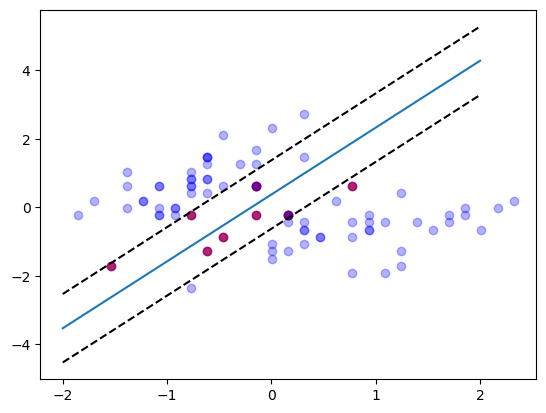

In [331]:
plt.scatter(model3.support_vectors_[:, 0], model3.support_vectors_[:, 1], color='red', alpha=0.8)
plt.scatter(scaled_X_train3[:, 0], scaled_X_train3[:, 1], color='blue', alpha=0.3)
plt.plot(range(-2, 3), line_equ4(range(-2, 3)))
plt.plot(range(-2, 3), list(map(lambda x:x+model3.C,line_equ4(range(-2, 3)))), color='black', linestyle='--')
plt.plot(range(-2, 3), list(map(lambda x:x-model3.C,line_equ4(range(-2, 3)))), color='black', linestyle='--')
plt.show()

In [337]:
model3.support_vectors_

array([[-0.76880981, -0.23052445],
       [-0.15067127,  0.61738157],
       [-0.15067127,  0.61738157],
       [-1.54148299, -1.71435998],
       [-0.15067127, -0.23052445],
       [ 0.158398  , -0.23052445],
       [-0.45974054, -0.86645396],
       [-0.61427517, -1.29040697],
       [ 0.77653654,  0.61738157],
       [ 0.158398  , -0.23052445]])

In [338]:
model3.support_vectors_[0][0], model3.support_vectors_[0][1]

(-0.7688098096478714, -0.23052444806920772)

In [336]:
line_equ4([model3.support_vectors_[0][0]])

[array([-1.12777709])]

In [340]:
model3.C / math.cos(45)

1.9035944074044246

In [ ]:
# w1x1 + w2x2 + b = 0
# w2x2 = -w1x1 -b
# x2 = -(w1x1 + b) / w2

array([ 5, 49, 59, 70,  0,  6, 15, 60, 74, 75])